### Import Dependancies 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

### Load Data 

In [2]:
enrollement = pd.read_csv('Enrollement_data.csv').rename(columns={'Student_No ':'reg_no', 'Department ':'Department'})
enrollement.shape

(300, 5)

In [3]:
enrollement.head()

enrollement.reg_no = enrollement.reg_no.str.strip() 

## EDA

In [4]:
enrollement.reg_no.nunique()  # each reg number is unique 

300

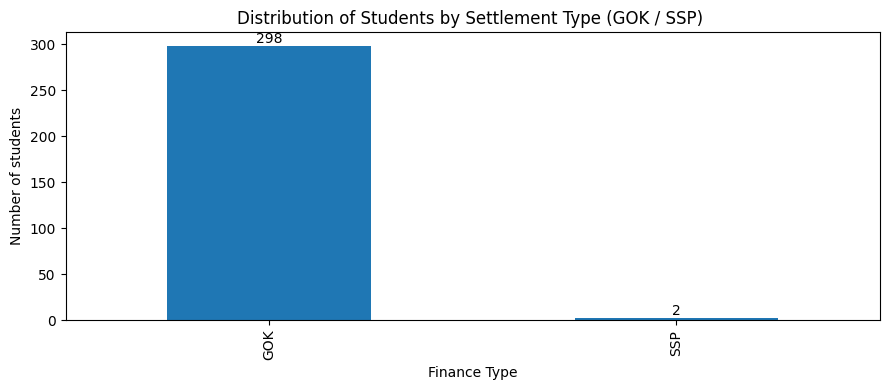

In [5]:
plt.figure(figsize=(9,4))
ax= enrollement['Settlement Type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.ylabel('Number of students')
plt.xlabel('Finance Type')
plt.title('Distribution of Students by Settlement Type (GOK / SSP) ')
plt.tight_layout()
plt.show()  # GOK sponsored students tend to dominate this cohort 

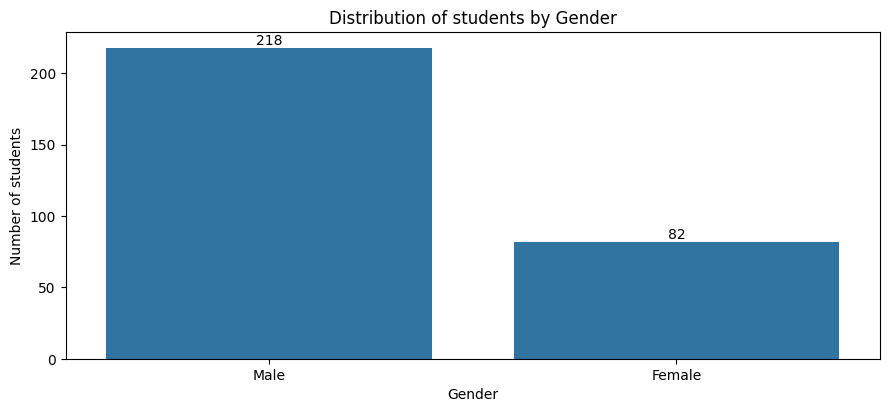

In [6]:
plt.figure(figsize=(9,4))
gender=enrollement.Gender.value_counts().reset_index()
ax = sns.barplot(gender,x='Gender',y='count',)
ax.bar_label(ax.containers[0])
plt.ylabel('Number of students')
plt.tight_layout()
plt.title('Distribution of students by Gender')
plt.show()   # male students have a high number in this cohort with a ratio of up to 2M:1F  

In [7]:
gender_dept=enrollement.groupby(['Department','Gender']).count().reset_index()
gender_dept

,Department,Gender,reg_no,Settlement Type,Status
0,AC,Female,13,13,13
1,AC,Male,27,27,27
2,AOL,Female,10,10,10
3,AOL,Male,16,16,16
4,APCS,Female,6,6,6
5,APCS,Male,34,34,34
6,IC,Female,9,9,9
7,IC,Male,33,33,33
8,INST,Female,8,8,8
9,INST,Male,31,31,31


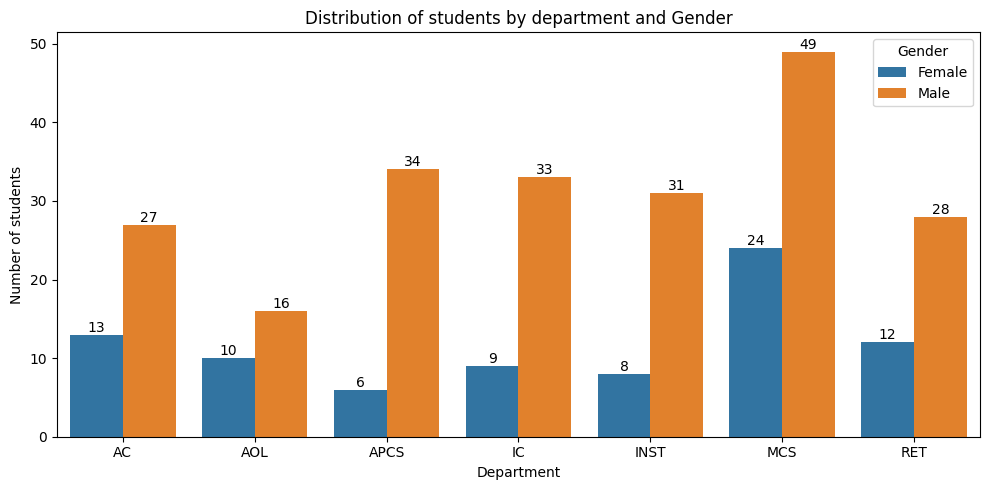

In [8]:
plt.figure(figsize=(10,5))
ax = sns.barplot(gender_dept,x='Department',y='reg_no',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Number of students')
plt.title('Distribution of students by department and Gender')
plt.tight_layout()
plt.show()

In [9]:
gender_status=enrollement.groupby(['Status','Gender']).count().reset_index()
gender_status

,Status,Gender,reg_no,Settlement Type,Department
0,Academic Leave,Male,9,9,9
1,Completed,Female,50,50,50
2,Completed,Male,101,101,101
3,Current,Female,25,25,25
4,Current,Male,91,91,91
5,Deceased,Male,1,1,1
6,Deregistered,Female,2,2,2
7,Deregistered,Male,7,7,7
8,Discontinued,Female,2,2,2
9,Discontinued,Male,3,3,3


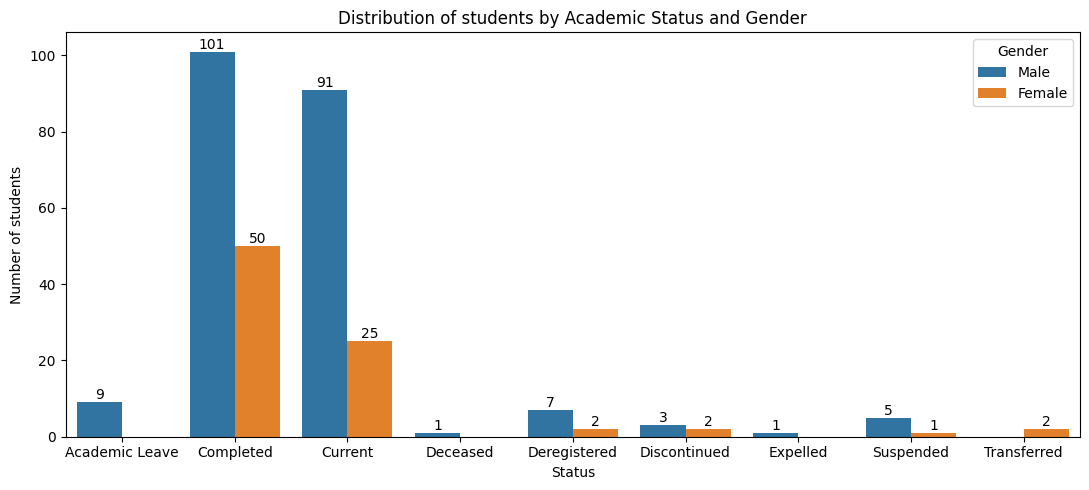

In [10]:
plt.figure(figsize=(11,5))
ax = sns.barplot(gender_status,x='Status',y='reg_no',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel('Number of students')
plt.title('Distribution of students by Academic Status and Gender')
plt.tight_layout()
plt.show()

Most of the students who did not manage to graduate repeated internally in the institution 

In [12]:
len(enrollement) - len(enrollement[enrollement.Status != 'Completed'])  # only 151 students out of the 305 enrolled students managed to graduate 

151

In [13]:
enrollement.reg_no 

0      SCT-251-001/2020
1      SCT-251-003/2020
2      SCT-251-004/2020
3      SCT-251-005/2020
4      SCT-251-006/2020
             ...       
295    SCT-258-003/2021
296    SCT-258-006/2021
297    SCT-258-016/2021
298    SCT-258-034/2021
299    SCT-258-040/2021
Name: reg_no, Length: 300, dtype: object

In [14]:
enrollement.reg_no.str.split('/').str[-1]

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
295    2021
296    2021
297    2021
298    2021
299    2021
Name: reg_no, Length: 300, dtype: object

In [15]:
enrollement['Year'] = enrollement.reg_no.str.split('/').str[-1]

enrollement.Year.value_counts()

Year
2020    268
2021     30
2019      2
Name: count, dtype: int64

### Performance Analysis 

## Year One

In [16]:
year_one=pd.read_excel('complete_year_one.xlsx').rename(columns={'Registration No.':'reg_no'})
year_one.columns

year_one.reg_no = year_one.reg_no.str.strip() 

In [17]:
year_one.reg_no.nunique() , year_one.shape

(286, (286, 3))

In [18]:
students_of_interest= enrollement[(enrollement.Year != '2021') & (enrollement.Year != '2019')]

In [19]:
students_of_interest.shape , year_one.shape

#Theres is an imbalance betwee the enrolled students and first years resutls 

((268, 6), (286, 3))

In [20]:
year_one['Year'] = year_one['reg_no'].str.split('-').str.get(2).str.split('/').str.get(1)
year_one['Year'].value_counts()

Year
2020       281
2019         2
2018RA1      1
2033         1
2017RA1      1
Name: count, dtype: int64

In [21]:
students_of_interest.reg_no.value_counts()

reg_no
SCT-258-044/2020    1
SCT-251-001/2020    1
SCT-251-003/2020    1
SCT-251-004/2020    1
SCT-251-005/2020    1
                   ..
SCT-251-018/2020    1
SCT-251-017/2020    1
SCT-251-016/2020    1
SCT-251-015/2020    1
SCT-251-014/2020    1
Name: count, Length: 268, dtype: int64

In [22]:
students_of_interest.Year.value_counts()

Year
2020    268
Name: count, dtype: int64

In [23]:
cleaned_year_one = year_one[~(year_one['Year'] != '2020')]  # we only include 2020 students in our study

In [26]:
# cleaned_year_one[cleaned_year_one.reg_no.isin(students_of_interest.reg_no)]

In [27]:
unenrolled_students= list(set(cleaned_year_one['reg_no']) - set(students_of_interest['reg_no']))

In [28]:
unenrolled_students

['SCT-254-077/2020',
 'SCT-254-059/2020',
 'SCT-254-076/2020',
 'SCT-253-006/2020',
 'SCT-254-054/2020',
 'SCT-258-036/2020',
 'SCT-256-026/2020',
 'SCT-256-027/2020',
 'SCT-251-039/2020',
 'SCT-258-015/2020',
 'SCT-258-045/2020',
 'SCT-254-078/2020',
 'SCT-255-042/2020',
 'SCT-255-032/2020',
 'SCT-253-022/2020',
 'SCT-253-017/2020']

In [30]:
 # this students were enrolled but no perfomance entry in their first year
no_performance=list(set(students_of_interest['reg_no']) - set(cleaned_year_one['reg_no']))

# we Chose to remove them 
students_of_interest=students_of_interest[~(students_of_interest.reg_no.isin(no_performance))]


In [31]:
list(set(students_of_interest['reg_no']) - set(cleaned_year_one['reg_no']) )

[]

In [32]:
len(list(set(cleaned_year_one['reg_no']) & set(students_of_interest['reg_no'])))

265

In [34]:
unenrolled_students_df=pd.DataFrame(unenrolled_students,columns=['reg_no'])
#we see 18 students with first year results but not enrolled 

In [35]:
# We chose to enrolled this students who we have results for year one but they are not on the enrollement report 
# This could be SSP students joining later......
# collecting attributes for the students being enrolled ...
unenrolled_students_df['Settlement Type'] ='SSP'  


In [36]:
list(unenrolled_students_df.reg_no.str.split('-').str.get(1).unique())

['254', '253', '258', '256', '251', '255']

In [37]:
def get_department(df):

    df['department_code']=df.reg_no.str.split('-').str.get(1)
    
    # unique_dept = list(unenrolled_students_df.reg_no.str.split('-').str.get(1).unique())
    
    dict={'254':"MCS" , '253':"APCS" ,'256':"RET",'258':"INST",'251':"IC",'255':"AOL",'252':"AC"}

    df['Department'] = df['department_code'].map(dict)
    
get_department(unenrolled_students_df)   

In [38]:
students_of_interest.Department.value_counts()

Department
MCS     65
RET     39
IC      39
APCS    35
AC      35
INST    32
AOL     20
Name: count, dtype: int64

In [193]:
# unenrolled_students_df # department 

In [40]:

# Set a random seed for reproducibility
np.random.seed(42)

gender = ['Female', 'Male'] 
unenrolled_students_df['Gender']=np.random.choice(gender, len(unenrolled_students_df), p=[0.5, 0.5])
unenrolled_students_df['Gender'].value_counts()


Gender
Female    8
Male      8
Name: count, dtype: int64

In [44]:
students_of_interest.drop(columns=['Status','Year'],inplace=True)

In [45]:
unenrolled_students_df.drop(columns=['department_code'],inplace=True)

In [46]:
all_students=pd.concat([students_of_interest,unenrolled_students_df],axis=0).reset_index()

In [47]:
all_students.shape,year_one.shape

((281, 5), (286, 4))

In [48]:
# all_students.tail()

In [49]:
students_to_remove=list(set(year_one.reg_no) - set(all_students.reg_no))
students_to_remove # not student of interest based on the study. We therefore drop these students 

['SCT-254-007/2017RA1',
 'SCT-253-034/2019',
 'SCT-258-019/2033',
 'SCT-253-015/2018RA1',
 'SCT-252-021/2019']

In [50]:
year_one=year_one[~year_one['reg_no'].isin(students_to_remove)]

In [52]:
all_students.shape , year_one.shape 

((281, 5), (281, 4))

In [53]:
list(set(year_one.reg_no) - set(all_students.reg_no))

[]

In [54]:
list(set(all_students.reg_no) - set(year_one.reg_no))

[]

In [55]:
combine_data=all_students.merge(year_one,on='reg_no').reset_index(drop=True)

In [57]:
combine_data.Remark.value_counts().index

Index(['PASS', 'SUPP', '             PASS', '             SUPP',
       'DEREGISTER, ABSCONDED', '6 FAILS,RP1', '7 FAILS, RP11',
       '6 FAILS, RP11', '7 FAILS,RP1', 'SUPE', '8 SPECIAL-MEDICAL GROUNDS',
       '1 SPECIAL MEDICAL GROUNDS, 4 FAILS', '             PASS           ',
       '        7 FAILS,RP1/', 'FINANCIAL  GROUNDS ACADEMIC LEAVE ON',
       '             PASS       ', '9 FAILS, DISCONTINUE',
       'ACADEMIC LEAVE ON FINACIAL GROUNDS', 'ACADEMIC LEAVE', '9 FAILS',
       '2 SPECIAL MEDICAL GROUNDS, S', ' ACADEMIC LEAVE ON FINANCIAL',
       '1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALs, COMPASSIONATE GROUNDS',
       '1 SPECIAL, COMPASSIONATE GROUNDS', 'DEREGISTER,ABSCODED',
       '8 FAILS,RP1', '2 SPECIAL COMPASSIONATE GROUNDS',
       'SPECIAL COMPASSIONATE GROUNDS & FARS', '7 FAILS, RP1', '6 FAILS, RP1',
       '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS', '6 FAILS, Rp11'],
      dtype='object', name='Remark')

In [58]:
#cleaning the remark columns for uniformity

combine_data['Cleaned_Remark'] = combine_data['Remark'].str.strip().str.upper()
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("SUPE","SUPP")
combine_data['Cleaned_Remark'] = combine_data['Cleaned_Remark'].str.replace("1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALS, COMPASSIONATE GROUNDS","1 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("1 SPECIAL, COMPASSIONATE GROUNDS","1 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("DEREGISTER,ABSCODED","DEREGISTER, ABSCONDED")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("SPECIAL COMPASSIONATE GROUNDS & FARS","2 SPECIAL COMPASSIONATE GROUNDS")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("FINANCIAL  GROUNDS ACADEMIC LEAVE ON","ACADEMIC LEAVE")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("ACADEMIC LEAVE ON FINANCIAL","ACADEMIC LEAVE")
combine_data['Cleaned_Remark']=combine_data['Cleaned_Remark'].str.replace("ACADEMIC LEAVE ON FINACIAL GROUNDS","ACADEMIC LEAVE")


rp1_list=['7 FAILS,RP1','6 FAILS, RP1','7 FAILS, RP1','8 FAILS,RP1','9 FAILS, DISCONTINUE','RP1/','9 FAILS','6 FAILS,RP1', '7 FAILS, RP11','RP11', '7 FAILS,RP1/']

for remark in rp1_list:
    combine_data['Cleaned_Remark'] = combine_data['Cleaned_Remark'].str.replace(remark,"RP1")
combine_data.Cleaned_Remark.value_counts().index

Index(['PASS', 'SUPP', 'RP1', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED',
       '2 SPECIAL COMPASSIONATE GROUNDS', '1 SPECIAL COMPASSIONATE GROUNDS',
       '1 SPECIAL MEDICAL GROUNDS, 4 FAILS', '8 SPECIAL-MEDICAL GROUNDS',
       '2 SPECIAL MEDICAL GROUNDS, S', '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS'],
      dtype='object', name='Cleaned_Remark')

In [59]:
combine_data[combine_data.Cleaned_Remark ==  '1 SPECIAL COMPASSIONATE GROUNDS, 2 SPECIALS, COMPASSIONATE GROUNDS' ]

,index,reg_no,Settlement Type,Gender,Department,GRADE,Remark,Year,Cleaned_Remark


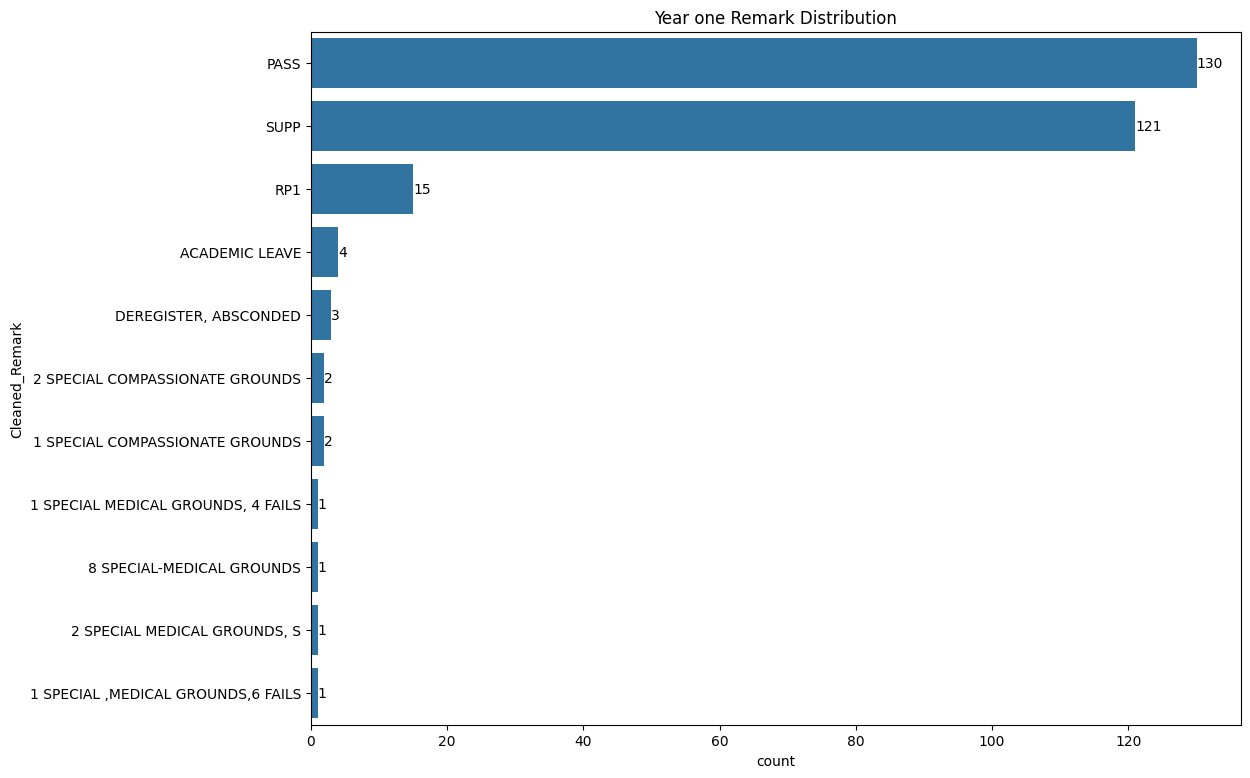

In [64]:
plt.figure(figsize=(12,9))

ax =sns.barplot(combine_data.Cleaned_Remark.value_counts().reset_index(),x='count',y='Cleaned_Remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.title('Year one Remark Distribution')
plt.show()

In [65]:
combine_data.groupby(['Department', 'Gender']).count().reset_index()

,Department,Gender,index,reg_no,Settlement Type,GRADE,Remark,Year,Cleaned_Remark
0,AC,Female,11,11,11,11,11,11,11
1,AC,Male,24,24,24,24,24,24,24
2,AOL,Female,8,8,8,8,8,8,8
3,AOL,Male,14,14,14,14,14,14,14
4,APCS,Female,8,8,8,8,8,8,8
5,APCS,Male,30,30,30,30,30,30,30
6,IC,Female,8,8,8,8,8,8,8
7,IC,Male,32,32,32,32,32,32,32
8,INST,Female,8,8,8,8,8,8,8
9,INST,Male,27,27,27,27,27,27,27


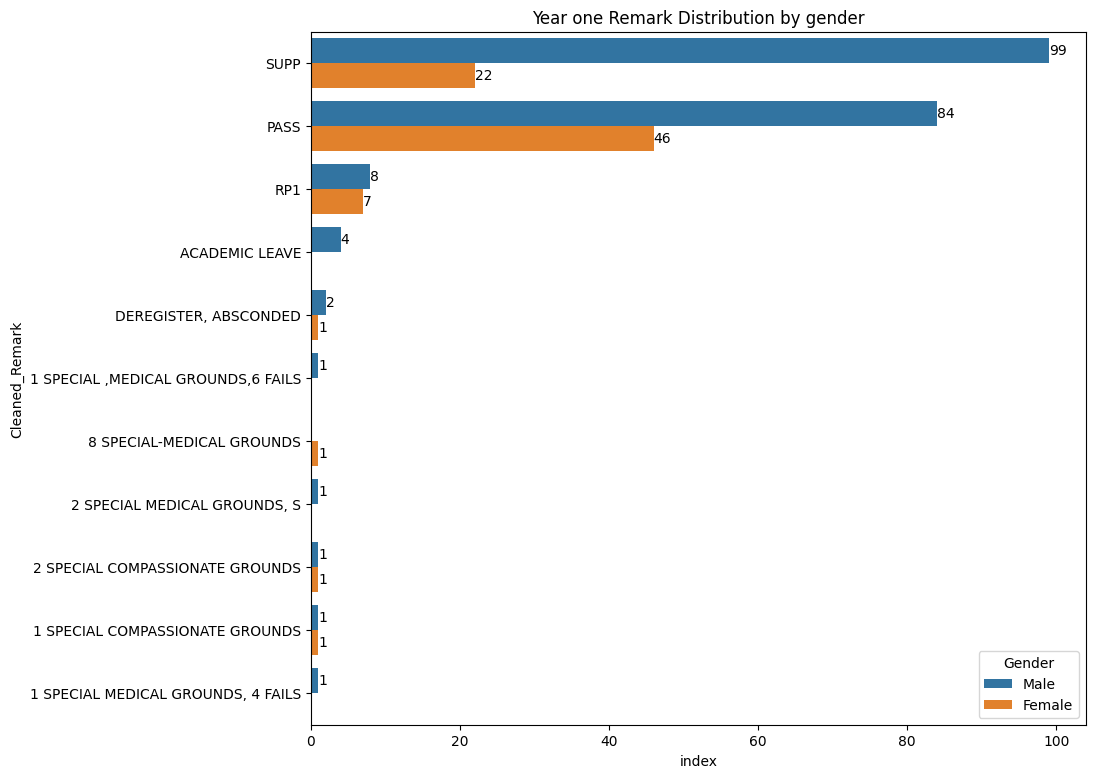

In [67]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Cleaned_Remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Cleaned_Remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Year one Remark Distribution by gender')
plt.show()

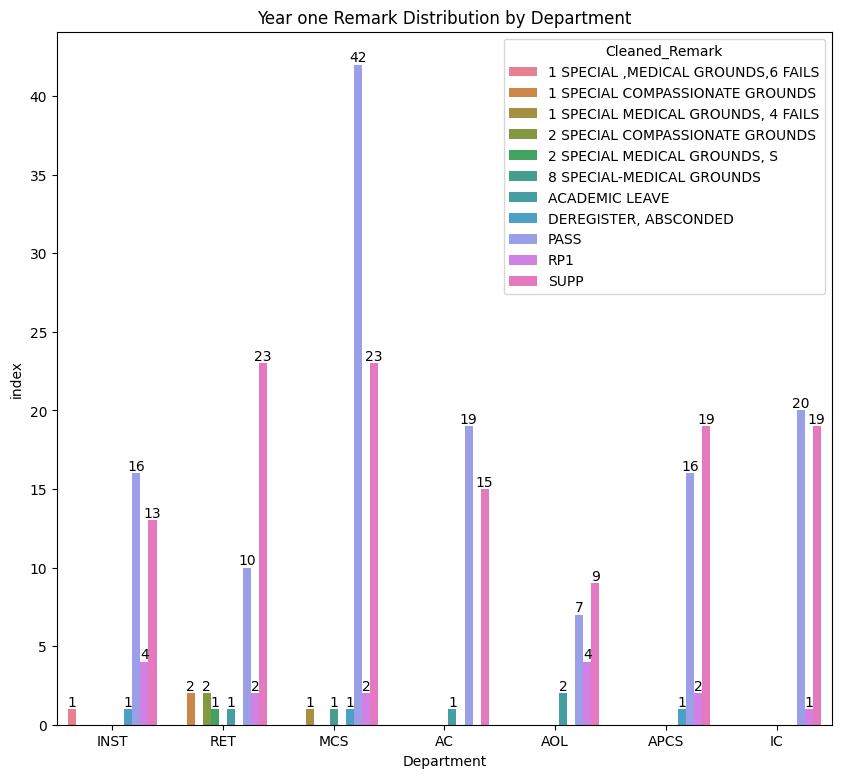

In [68]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Cleaned_Remark', 'Department']).count().reset_index(),y='index',x='Department',hue='Cleaned_Remark')

for num in range(len(ax.containers)):
    ax.bar_label(ax.containers[num])
plt.title('Year one Remark Distribution by Department')
plt.show()

In [69]:
combine_data.GRADE = combine_data.GRADE.str.strip()
combine_data.GRADE.value_counts()

GRADE
C    137
D     69
B     51
E     19
A      5
Name: count, dtype: int64

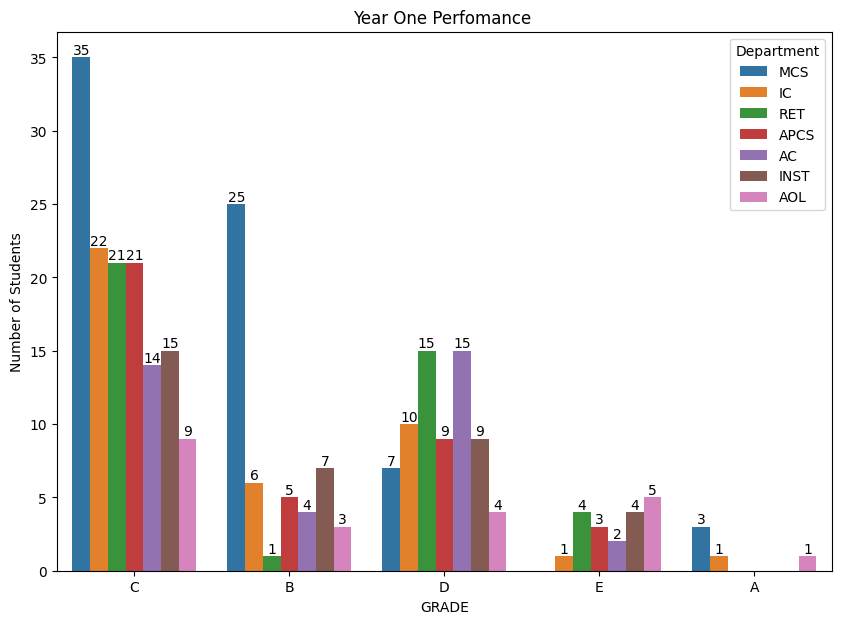

In [70]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_data.groupby(['Department', 'GRADE']).count().sort_values(by='index',ascending=False).reset_index(),y='index',x='GRADE',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Year One Perfomance ")
plt.ylabel('Number of Students')
plt.xlabel('GRADE')
plt.show()

In [71]:
combine_data.Cleaned_Remark.value_counts().index

Index(['PASS', 'SUPP', 'RP1', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED',
       '2 SPECIAL COMPASSIONATE GROUNDS', '1 SPECIAL COMPASSIONATE GROUNDS',
       '1 SPECIAL MEDICAL GROUNDS, 4 FAILS', '8 SPECIAL-MEDICAL GROUNDS',
       '2 SPECIAL MEDICAL GROUNDS, S', '1 SPECIAL ,MEDICAL GROUNDS,6 FAILS'],
      dtype='object', name='Cleaned_Remark')

In [72]:
first_year_dropouts=['RP1', 'DEREGISTER, ABSCONDED', 'ACADEMIC LEAVE',]


combine_data.loc[combine_data['Cleaned_Remark'].isin(first_year_dropouts), "Time"] = 1  #These students only lasted for 1 year in the institution 

In [73]:
expected_second_years=combine_data[combine_data.Time.isnull()]  # expecting 259 students in the second year 
expected_second_years.shape

(259, 10)

In [74]:
combine_data.rename(columns={"GRADE":"Year_one","Cleaned_Remark":"Year1_remark"},inplace=True)

In [75]:
combine_data[(combine_data.Year1_remark == 'RP1') & (combine_data.Time.isna())]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year,Year1_remark,Time


In [78]:
# combine_data.loc[(combine_data.Year_one == "D") & (combine_data.Year1_remark == "PASS")]

### Year Two 

In [79]:
year_two=pd.read_excel('complete_year_two.xlsx').rename(columns={'Registration No.':"reg_no",'Remarks':"Year2_remark"})
# year_two[year_two.reg_no == 'SCT-255-030/2020']

In [80]:
year_two.reg_no = year_two.reg_no.str.strip()

In [81]:
year_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reg_no        260 non-null    object
 1   GRADE         260 non-null    object
 2   Year2_remark  168 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [82]:
year_two['Year'] = year_two['reg_no'].str.split('-').str.get(2).str.split('/').str.get(1)
year_two['Year'].value_counts()

Year
2020        247
2019RA2       7
2019          2
20198p11      1
2019RP11      1
2018Rp11      1
2019RAZ       1
Name: count, dtype: int64

In [83]:
year_two=year_two[~(year_two.Year != '2020')]
year_two.shape

(247, 4)

In [85]:
year_two.reg_no.value_counts()

reg_no
SCT-256-001/2020    1
SCT-256-002/2020    1
SCT-256-003/2020    1
SCT-256-004/2020    1
SCT-256-007/2020    1
                   ..
SCT-252-039/2020    1
SCT-252-040/2020    1
SCT-252-041/2020    1
SCT-252-043/2020    1
SCT-252-052/2020    1
Name: count, Length: 247, dtype: int64

In [86]:
unique_expected_second_years=set(expected_second_years.reg_no) - set(year_two.reg_no)

In [87]:
unique_year_two=set(year_two.reg_no) - set(expected_second_years.reg_no)
len(unique_expected_second_years-unique_year_two)

14

In [88]:
lost_for_study = unique_expected_second_years-unique_year_two ## Students lost between first year and second year (present results for first year with no results in second year )

lost_for_study

{'SCT-251-012/2020',
 'SCT-251-022/2020',
 'SCT-251-034/2020',
 'SCT-251-039/2020',
 'SCT-252-010/2020',
 'SCT-252-027/2020',
 'SCT-253-006/2020',
 'SCT-253-016/2020',
 'SCT-253-019/2020',
 'SCT-253-056/2020',
 'SCT-254-073/2020',
 'SCT-254-080/2020',
 'SCT-256-032/2020',
 'SCT-256-041/2020'}

In [90]:
combine_data.loc[combine_data.reg_no.isin(lost_for_study), "Time"] = 1  ## we assume they survived till year one 

In [91]:
year_two = year_two[~year_two.reg_no.isin(set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no))]

In [92]:
combine_data[combine_data.Time.isna()].shape, year_two.shape

((245, 10), (245, 4))

In [93]:
combine_data.loc[combine_data.reg_no.isin(set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no)), "Time"] = 1

In [94]:
set(year_two.reg_no) - set(combine_data[combine_data.Time.isna()].reg_no)

set()

In [99]:
year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE FINANCIAL GROUNDS',
       'DEREGISTER, ABSCONDED', 'DISCONTINUE', 'DEREGISTER, ABSCENDED',
       'SPECIAL ON FINANCIAL', 'DEREGISTER ABSCONDED', 'RP2',
       'ACADEMIC SLAVE FINANCIAL GROUNDS', 'SPECIAL EVALS MEDICAL KHOUNDS',
       'SPECIAL FINANCIAL GROUNDS', ' ', 'Rpy',
       'ACADEMIC LEAVE-FINANCIAL GROUNDS', 'LEAVE FIN. GROUNDS',
       'SUSPENDED, EMPREG CHA 2203'],
      dtype='object', name='Year2_remark')

In [100]:
year_two['Year2_remark'] = year_two['Year2_remark'].str.strip().str.upper()
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC LEAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC LEAVE-FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("LEAVE FIN. GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("ACADEMIC SLAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("DEREGISTER, ABSCENDED","DEREGISTER, ABSCONDED")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("DEREGISTER ABSCONDED","DEREGISTER, ABSCONDED")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SUSPENDED, EMPREG CHA 2203","SESPENDED, EXAM IRREGULARITY")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("RPY","RP2")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SPECIAL ON FINANCIAL","SPECIAL FINANCIAL GROUNDS")
year_two['Year2_remark']=year_two['Year2_remark'].str.replace("SPECIAL EVALS MEDICAL KHOUNDS","SPECIAL ON MEDICAL GROUNDS")

In [101]:
year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED', 'RP2',
       'SPECIAL FINANCIAL GROUNDS', 'DISCONTINUE',
       'SPECIAL ON MEDICAL GROUNDS', '', 'SESPENDED, EXAM IRREGULARITY'],
      dtype='object', name='Year2_remark')

In [103]:
# year_two.loc[(year_two.GRADE == "D") & (year_two.Year2_remark == "PASS")]

In [104]:
year_two[year_two.Year2_remark.isna()].GRADE.value_counts()

pass_grade=["A","B","C","D"]


year_two.loc[(year_two.GRADE == "A") | (year_two.GRADE == "B") | (year_two.GRADE == "C") & (year_two.Year2_remark.isna()) ,"Year2_remark"] = "PASS"
year_two.loc[(year_two.GRADE == "D") & (year_two.Year2_remark.isna()),"Year2_remark"] = "SUPP"
year_two.loc[(year_two.GRADE == "E") & (year_two.Year2_remark.isna()),"Year2_remark"] = "SUPP"

In [105]:
year_two.Year2_remark.value_counts()

Year2_remark
PASS                          123
SUPP                          102
ACADEMIC LEAVE                  7
DEREGISTER, ABSCONDED           6
RP2                             2
SPECIAL FINANCIAL GROUNDS       2
DISCONTINUE                     2
SPECIAL ON MEDICAL GROUNDS      1
Name: count, dtype: int64

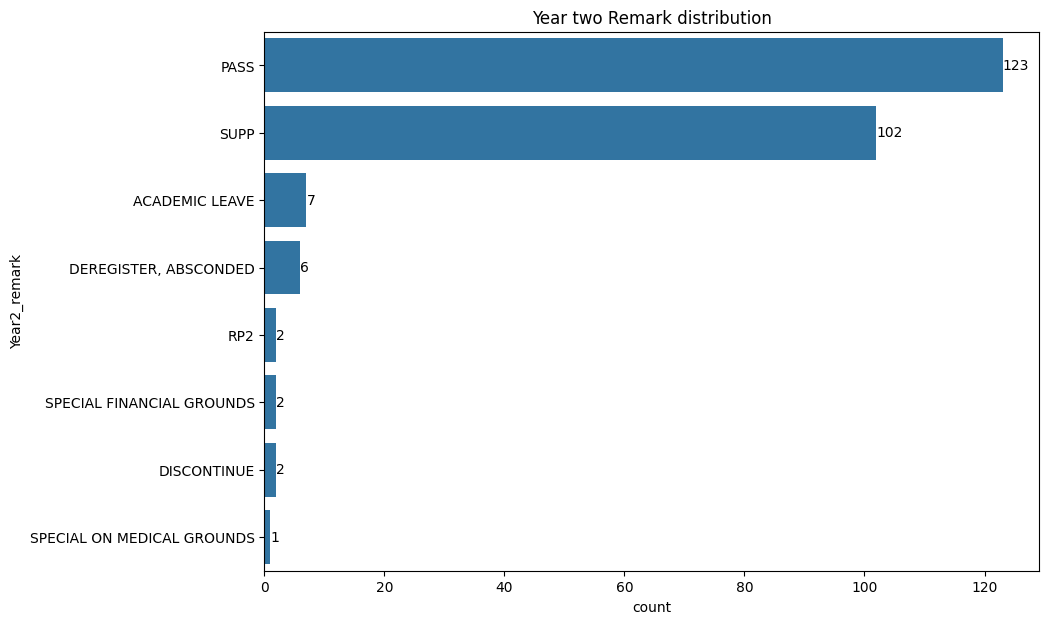

In [107]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_two.Year2_remark.value_counts().reset_index(),x='count',y='Year2_remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.title("Year two Remark distribution")
plt.show()

In [108]:
combined_year_two = pd.merge(combine_data,year_two,on='reg_no',how='left').rename(columns={"GRADE":"Year_two"}).drop(columns=['Year_y','Year_x'],axis=1)

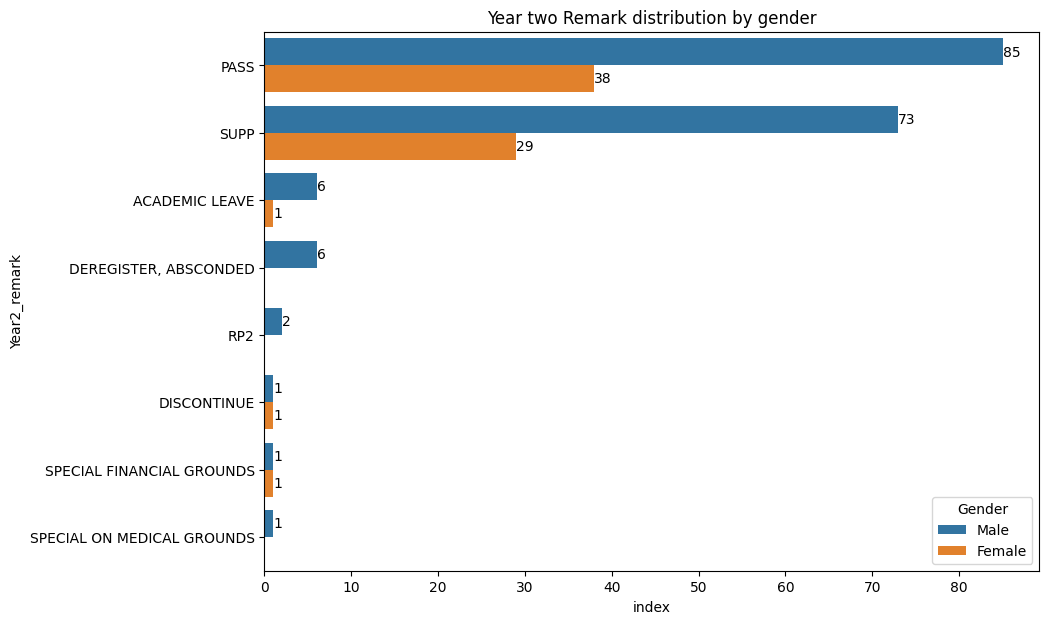

In [110]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combined_year_two.groupby(['Year2_remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Year2_remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Year two Remark distribution by gender")
plt.show()

In [111]:
combined_year_two[combined_year_two.Year_two == '8' ]

combined_year_two.loc[combined_year_two.Year_two == '8' , "Year_two"] = "B"

# estimate perfomance based on previous and future results 
combined_year_two.loc[combined_year_two.Year_two == '#VALUE!', "Year_two"] = "C"
combined_year_two.loc[combined_year_two.Year_two == 'VALUE', "Year_two"] = "B"

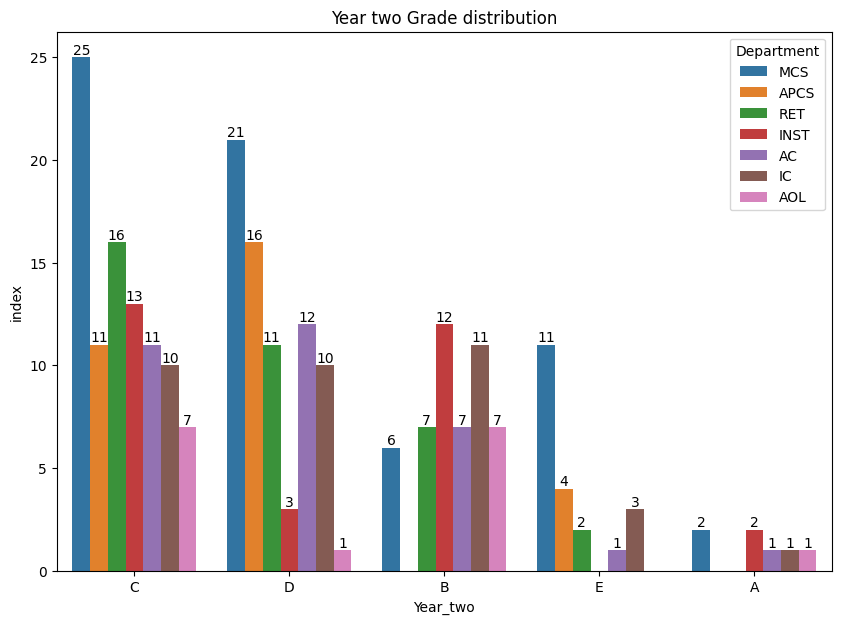

In [113]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combined_year_two.groupby(['Department', 'Year_two']).count().sort_values(by='index',ascending=False).reset_index(),y='index',x='Year_two',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Year two Grade distribution")
plt.show()

In [114]:
combined_year_two.shape

(281, 11)

In [116]:
combined_year_two.Year_two.value_counts().index

Index(['C', 'D', 'B', 'E', 'A'], dtype='object', name='Year_two')

In [117]:
combined_year_two.Time.isnull().sum()

np.int64(245)

In [118]:
combined_year_two.isnull().sum()

index                0
reg_no               0
Settlement Type      0
Gender               0
Department           0
Year_one             0
Remark               0
Year1_remark         0
Time               245
Year_two            36
Year2_remark        36
dtype: int64

In [119]:
# combined_year_two[combined_year_two.Year_two.isnull()]  # first year drop outs 

In [120]:
combined_year_two.Year2_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE', 'DEREGISTER, ABSCONDED', 'RP2',
       'DISCONTINUE', 'SPECIAL FINANCIAL GROUNDS',
       'SPECIAL ON MEDICAL GROUNDS'],
      dtype='object', name='Year2_remark')

In [121]:
Second_year_dropouts = ['DISCONTINUE','ACADEMIC LEAVE','DEREGISTER, ABSCONDED','RP2']

combined_year_two.loc[combined_year_two.Year2_remark.isin(Second_year_dropouts),"Time"] = 2

In [122]:
combined_year_two.isnull().sum() ## we expect 228 students of interest in 3rd year

index                0
reg_no               0
Settlement Type      0
Gender               0
Department           0
Year_one             0
Remark               0
Year1_remark         0
Time               228
Year_two            36
Year2_remark        36
dtype: int64

## Year Three

In [123]:
year_three=pd.read_excel('complete_year_three.xlsx').rename(columns={"Grade":"Year_three","Registration No.":"reg_no"})
year_three['reg_no'] = year_three['reg_no'].str.strip()
year_three['Remark'] = year_three['Remark'].str.strip()
year_three.reg_no.value_counts()

reg_no
SCT-255-014/2019    2
SCT-254-001/2020    1
SCT-254-006/2020    1
SCT-254-016/2020    1
SCT-254-017/2020    1
                   ..
SCT-253-046/2020    1
SCT-253-049/2020    1
SCT-253-050/2020    1
SCT-253-051/2020    1
SCT-253-053/2020    1
Name: count, Length: 230, dtype: int64

In [124]:
year_three.Remark.value_counts()


Remark
PASS                                           125
SUPP                                            79
ACADEMIC LEAVE FINANCIAL GROUNDS                 3
Rp31                                             2
ACADEMIC LEAVE-FINANCIAL GROUNDS                 2
7 SPECIAL, FINANCIAL GROUNDS,                    1
SUSPENDED-EXAM IRREG.                            1
SPECIALS, MEDICAL GROUNDS                        1
1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL             1
SPECIAL DISCIPLINARY GROUNDS, 5 FAILS            1
DISCONTINUE                                      1
1 SPECIAL, FINANCIAL GROUNDS                     1
1 SPECIAL FINANCIAL GROUNDS, 6 FAILS             1
7 SPECIALS MEDICAL GROUNDS                       1
SUSPENDED EXAM IRRG O 2308                       1
3 SPECIALS FINANCIAL GROUNDS, 4 FAILS            1
4 specials, financial grounds, 1 fail            1
SUPENDED EXAM IRRG-CHI 2308                      1
1 SPECIAL EXAM, 5 FAILS                          1
SUSPENDED-EXAM IRREG    

In [125]:
year_three['Year'] = year_three.reg_no.str.split('-').str.get(2).str.split('/').str.get(1)
year_three['Year'] = year_three['Year'].str.strip()

In [126]:
year_three.Year.value_counts()

Year
2020           199
2019            17
2018             6
2019RA3          2
2017             1
2015             1
2015RA2          1
2019rP3DRAJ      1
2013RA2RA3       1
2019Rp21         1
2019Rp11         1
Name: count, dtype: int64

In [127]:
year_three = year_three[~(year_three.Year != '2020')]

In [128]:
len(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))

0

In [129]:
combined_year_two[combined_year_two.reg_no.isin(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_remark,Time,Year_two,Year2_remark


In [130]:
year_three[year_three.reg_no.isin(set(year_three.reg_no) - set(combined_year_two[combined_year_two.Time.isna()].reg_no))].reg_no

Series([], Name: reg_no, dtype: object)

In [131]:
year_three[year_three.reg_no == "SCT-255-30/2020"]

,reg_no,Year_three,Remark,Year


In [132]:
combined_year_two[combined_year_two.reg_no == "SCT-255-30/2020"]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Remark,Year1_remark,Time,Year_two,Year2_remark


In [134]:
# combined_year_two[combined_year_two.reg_no == "SCT-255-030/2020"]

In [135]:
year_three.Remark.value_counts()

Remark
PASS                                     115
SUPP                                      64
ACADEMIC LEAVE FINANCIAL GROUNDS           3
SUSPENDED-EXAM IRREG.                      1
SPECIALS, MEDICAL GROUNDS                  1
1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL       1
DISCONTINUE                                1
1 SPECIAL, FINANCIAL GROUNDS               1
4 specials, financial grounds, 1 fail      1
1 SPECIAL FINANCIAL GROUNDS, 6 FAILS       1
SUSPENDED EXAM IRRG O 2308                 1
SPECIAL DISCIPLINARY GROUNDS, 5 FAILS      1
3 SPECIALS FINANCIAL GROUNDS, 4 FAILS      1
SUPENDED EXAM IRRG-CHI 2308                1
SUSPENDED-EXAM IRREG                       1
ACADEMIC LEAVE-FINANCIAL GROUNDS           1
2.SPECIAL FINANCIAL                        1
Rp31                                       1
GROUNDS 4 FAIL                             1
1 SPECIAL MEDICAL GROUNDS 3 FAILS          1
Name: count, dtype: int64

In [136]:
year_three['Remark'] = year_three['Remark'].str.strip().str.upper()
year_three['Remark']=year_three['Remark'].str.replace("ACADEMIC LEAVE FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_three['Remark']=year_three['Remark'].str.replace("ACADEMIC LEAVE-FINANCIAL GROUNDS","ACADEMIC LEAVE")
year_three['Remark']=year_three['Remark'].str.replace("1 SPECIAL, FINANCIAL GROUNDS, 1 FAIL","1 SPECIAL, FINANCIAL GROUNDS")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED EXAM IRRG O 2308","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUPENDED EXAM IRRG-CHI 2308","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREG","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREG.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYY.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYYULARITY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITYY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITY.","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("SUSPENDED-EXAM IRREGULARITYULARITY","SUSPENDED-EXAM IRREGULARITY")
year_three['Remark']=year_three['Remark'].str.replace("4 specials, financial grounds, 1 fail","4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL")
year_three['Remark']=year_three['Remark'].str.replace("2.SPECIAL FINANCIAL","2 SPECIAL, FINANCIAL GROUNDS")
year_three['Remark']=year_three['Remark'].str.replace("RP31","RP3")
year_three['Remark']=year_three['Remark'].str.replace("GROUNDS 4 FAIL","4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL")


In [137]:
year_three.Remark.value_counts().index

Index(['PASS', 'SUPP', 'SUSPENDED-EXAM IRREGULARITY', 'ACADEMIC LEAVE',
       '4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL', '1 SPECIAL, FINANCIAL GROUNDS',
       'DISCONTINUE', 'SPECIALS, MEDICAL GROUNDS',
       '1 SPECIAL FINANCIAL GROUNDS, 6 FAILS',
       'SPECIAL DISCIPLINARY GROUNDS, 5 FAILS',
       '3 SPECIALS FINANCIAL GROUNDS, 4 FAILS', '2 SPECIAL, FINANCIAL GROUNDS',
       'RP3', '1 SPECIAL MEDICAL GROUNDS 3 FAILS'],
      dtype='object', name='Remark')

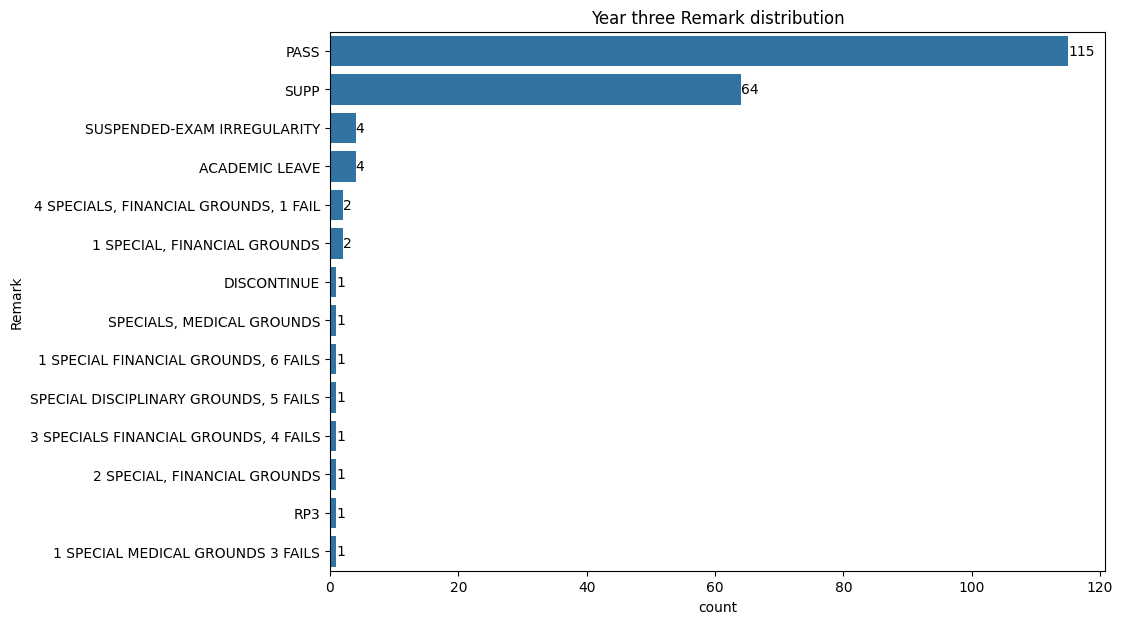

In [138]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_three.Remark.value_counts().reset_index(),x='count',y='Remark')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.title("Year three Remark distribution")
plt.show()

In [139]:
year_three.rename(columns={"Remark":"Year3_remark"},inplace=True)

In [140]:
combine_year_three= pd.merge(combined_year_two,year_three , on='reg_no', how='left').rename(columns={"Remark":"Year1_remark"}).drop_duplicates()


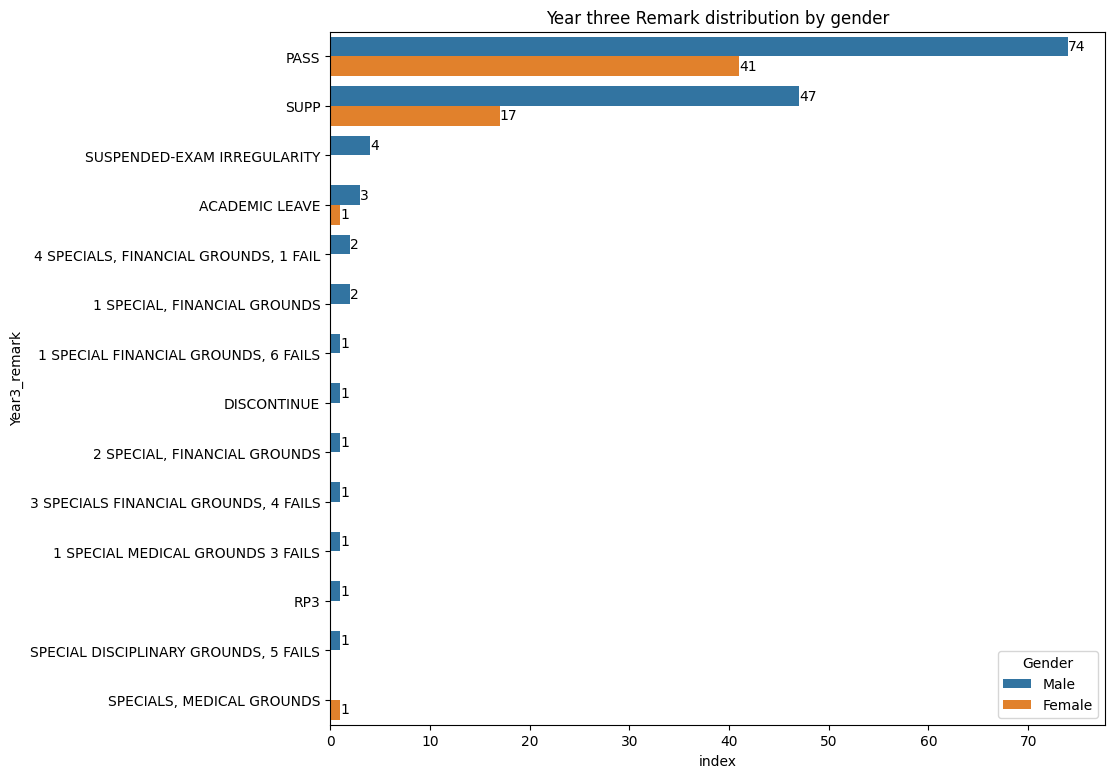

In [144]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_year_three.groupby(['Year3_remark', 'Gender']).count().sort_values(by='index',ascending=False).reset_index(),x='index',y='Year3_remark',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Year three Remark distribution by gender")
plt.show()

In [145]:
combine_year_three.Year_three.value_counts()

Year_three
C    79
B    48
D    47
A    15
E     9
Name: count, dtype: int64

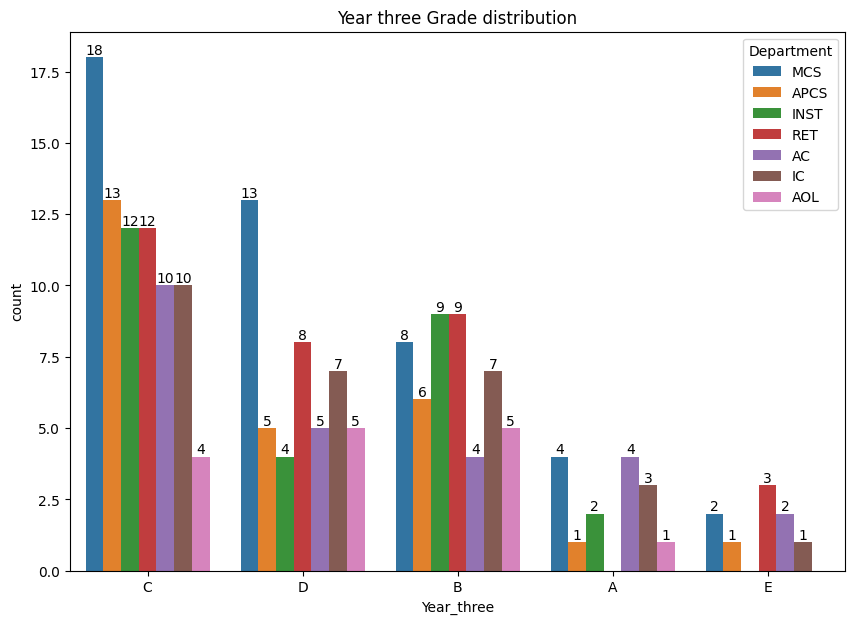

In [185]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(combine_year_three.groupby(['Department', 'Year_three']).count().sort_values(by='index',ascending=False).reset_index().rename(columns={"index":"count"}),y='count',x='Year_three',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title("Year three Grade distribution")
plt.show()

In [148]:
combine_year_three.Year3_remark.value_counts().index

Index(['PASS', 'SUPP', 'ACADEMIC LEAVE', 'SUSPENDED-EXAM IRREGULARITY',
       '4 SPECIALS, FINANCIAL GROUNDS, 1 FAIL', '1 SPECIAL, FINANCIAL GROUNDS',
       '3 SPECIALS FINANCIAL GROUNDS, 4 FAILS',
       '1 SPECIAL FINANCIAL GROUNDS, 6 FAILS', 'DISCONTINUE',
       'SPECIALS, MEDICAL GROUNDS', 'SPECIAL DISCIPLINARY GROUNDS, 5 FAILS',
       'RP3', '2 SPECIAL, FINANCIAL GROUNDS',
       '1 SPECIAL MEDICAL GROUNDS 3 FAILS'],
      dtype='object', name='Year3_remark')

In [149]:
third_year_dropout=['SUSPENDED-EXAM IRREGULARITY','ACADEMIC LEAVE','DISCONTINUE','RP3']

combine_year_three.loc[combine_year_three.Year3_remark.isin(third_year_dropout), "Time"] = 3

In [150]:
combine_year_three.Time.value_counts()

Time
1.0    36
2.0    17
3.0    10
Name: count, dtype: int64

In [151]:
combine_year_three.isnull().sum() # Expecting 218 students to transition to year 4 

index                0
reg_no               0
Settlement Type      0
Gender               0
Department           0
Year_one             0
Year1_remark         0
Year1_remark         0
Time               218
Year_two            36
Year2_remark        36
Year_three          83
Year3_remark        82
Year                82
dtype: int64

## Year four

In [152]:
year_four=pd.read_excel('complete_year_four.xlsx').rename(columns={"Registration No.":"reg_no", "GRADE":"Year_four","Remarks":"Year4_remarks"}).drop_duplicates(subset="reg_no")
year_four.reg_no =year_four.reg_no.str.strip()
year_four.Year4_remarks =year_four.Year4_remarks.str.strip()

In [153]:
year_four.reg_no.value_counts()

reg_no
CIT-224-082/2013    1
SCT-254-002/2020    1
SCT-254-005/2020    1
SCT-254-008/2020    1
SCT-254-009/2020    1
                   ..
SCT-252-038/2020    1
SCT-252-039/2019    1
SCT-252-040/2020    1
SCT-252-041/2019    1
SCT-252-042/2020    1
Name: count, Length: 193, dtype: int64

In [155]:
year_four['Year'] = year_four.reg_no.str.split('-').str.get(2).str.split('/').str.get(1)
year_four.Year.value_counts()

Year
2020    168
2019     19
2018      4
2013      1
2017      1
Name: count, dtype: int64

In [156]:
year_four =  year_four[~(year_four.Year != '2020')]
year_four.Year.value_counts()

Year
2020    168
Name: count, dtype: int64

In [157]:
year_four.shape , combine_year_three[combine_year_three.Time.isna()].shape

((168, 4), (218, 14))

In [158]:
len(set(year_four.reg_no)) , len(set(combine_year_three[combine_year_three.Time.isna()].reg_no))

(168, 218)

In [159]:
combine_year_three[combine_year_three.Time.isna()].shape

(218, 14)

In [160]:
#We opt to drop them 
year_four = year_four[~year_four.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

In [161]:
lost_for_study_y3= set(combine_year_three[combine_year_three.Time.isna()].reg_no) - set(year_four.reg_no)

In [163]:
# combine_year_three[combine_year_three.reg_no.isin(lost_for_study_y3)]

In [164]:
lost_for_study_y3 # These student get lost in third year since we don't have 4th year result for them 

#We chose to classify them as 3rd year dropouts 
combine_year_three.loc[combine_year_three.reg_no.isin(lost_for_study_y3), "Time"] =  3

In [165]:
combine_year_three.isnull().sum()

index                0
reg_no               0
Settlement Type      0
Gender               0
Department           0
Year_one             0
Year1_remark         0
Year1_remark         0
Time               164
Year_two            36
Year2_remark        36
Year_three          83
Year3_remark        82
Year                82
dtype: int64

In [166]:
list(set(year_four.reg_no) - set(combine_year_three.reg_no)) # These students appear in fourth year with no trail of results from year 1,2 or 3 !!

[]

In [167]:
combine_year_three[combine_year_three.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

,index,reg_no,Settlement Type,Gender,Department,Year_one,Year1_remark,Year1_remark,Time,Year_two,Year2_remark,Year_three,Year3_remark,Year


In [168]:
year_four[year_four.reg_no.isin(list(set(year_four.reg_no) - set(combine_year_three.reg_no)))] # all have the same grade in year 4

,reg_no,Year_four,Year4_remarks,Year


In [169]:
#We opt to drop them 
year_four = year_four[~year_four.reg_no.isin(set(year_four.reg_no) - set(combine_year_three.reg_no))]

In [170]:
year_four.shape, combine_year_three[combine_year_three.Time.isna()].shape

((165, 4), (164, 14))

In [171]:
year_four.Year4_remarks.value_counts().index

Index(['PASS', 'SUPP', 'WITHHOLD (DISCIPLINARY)', 'WITHHOLD(DISCIPLINARY)',
       'SUSPENSION EXAM IRREG', '2-SPECIALS ON COMPASSIONATE GROUNDS',
       '7 SPECIAL,MEDICAL'],
      dtype='object', name='Year4_remarks')

In [172]:
year_four.Year4_remarks = year_four.Year4_remarks.str.replace("WITHHOLD (DISCIPLINARY)","WITHHOLD(DISCIPLINARY)")

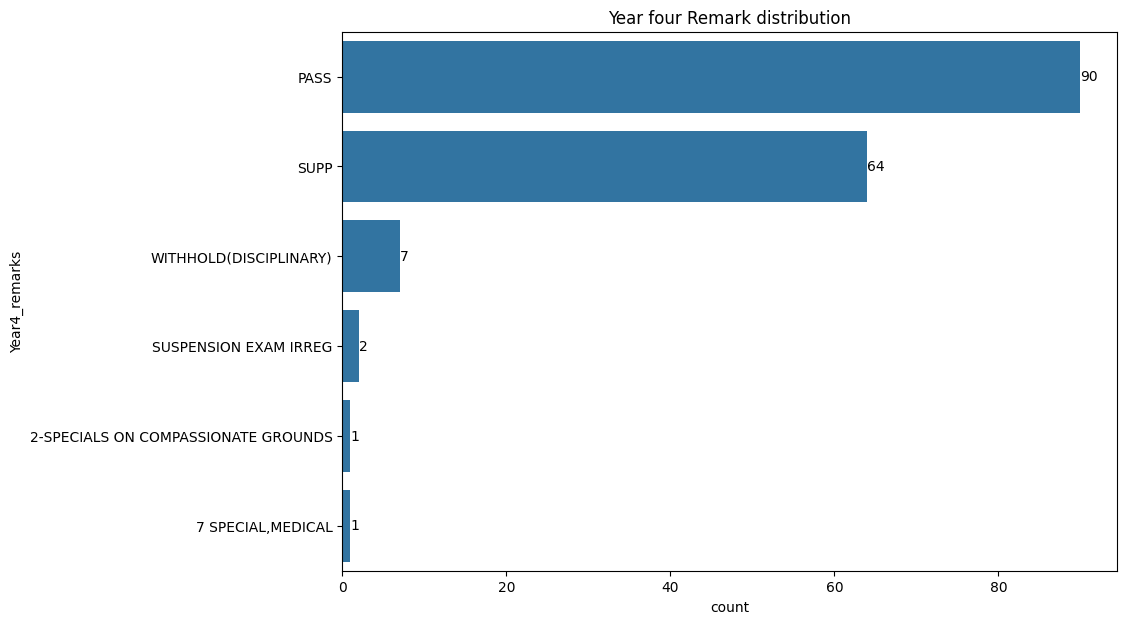

In [174]:
plt.figure(figsize=(10,7))

ax =sns.barplot(year_four.Year4_remarks.value_counts().reset_index(),x='count',y='Year4_remarks')
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.title("Year four Remark distribution")
plt.show()

In [175]:
year_four.Year4_remarks.value_counts().index

Index(['PASS', 'SUPP', 'WITHHOLD(DISCIPLINARY)', 'SUSPENSION EXAM IRREG',
       '2-SPECIALS ON COMPASSIONATE GROUNDS', '7 SPECIAL,MEDICAL'],
      dtype='object', name='Year4_remarks')

In [177]:
final_data=pd.merge(combine_year_three,year_four,on='reg_no',how='left').drop(columns=['Year_x','Year_y','index'],axis=1)
final_data

final_data = final_data.loc[:, ~final_data.columns.duplicated()]


In [178]:
fourth_year_dropouts= ['WITHHOLD(DISCIPLINARY)','SUSPENSION EXAM IRREG']

final_data.loc[final_data.Year4_remarks.isin(fourth_year_dropouts), "Time" ] = 4

In [179]:
final_data.isnull().sum()

reg_no               0
Settlement Type      0
Gender               0
Department           0
Year_one             0
Year1_remark         0
Time               155
Year_two            36
Year2_remark        36
Year_three          83
Year3_remark        82
Year_four          116
Year4_remarks      116
dtype: int64

In [180]:
final_data.Time.value_counts()

Time
3.0    64
1.0    36
2.0    17
4.0     9
Name: count, dtype: int64

In [181]:
final_data.groupby(['Year4_remarks', 'Gender']).count()

reg_no  Settlement Type  \
Year4_remarks                       Gender                            
2-SPECIALS ON COMPASSIONATE GROUNDS Female       1                1   
7 SPECIAL,MEDICAL                   Female       1                1   
PASS                                Female      37               37   
                                    Male        53               53   
SUPP                                Female      16               16   
                                    Male        48               48   
SUSPENSION EXAM IRREG               Female       1                1   
                                    Male         1                1   
WITHHOLD(DISCIPLINARY)              Male         7                7   

                                            Department  Year_one  \
Year4_remarks                       Gender                         
2-SPECIALS ON COMPASSIONATE GROUNDS Female           1         1   
7 SPECIAL,MEDICAL                   Female           1         1   
PASS                                Female          37        37   
                                    Male            53        53   
SUPP                                Female          16        16   
                                    Male            48        48   
SUSPENSION EXAM IRREG               Female           1         1   
                                    Male             1         1   
WITHHOLD(DISCIPLINARY)              Male             7         7   

                                            Year1_remark  Time  Year_two  \
Year4_remarks                       Gender                                 
2-SPECIALS ON COMPASSIONATE GROUNDS Female             1     0         1   
7 SPECIAL,MEDICAL                   Female             1     0         1   
PASS                                Female            37     0        37   
                                    Male              53     0        53   
SUPP                                Female            16     0        16   
                                    Male              48     1        48   
SUSPENSION EXAM IRREG               Female             1     1         1   
                                    Male               1     1         1   
WITHHOLD(DISCIPLINARY)              Male               7     7         7   

                                            Year2_remark  Year_three  \
Year4_remarks                       Gender                             
2-SPECIALS ON COMPASSIONATE GROUNDS Female             1           0   
7 SPECIAL,MEDICAL                   Female             1           1   
PASS                                Female            37          35   
                                    Male              53          48   
SUPP                                Female            16          16   
                                    Male              48          45   
SUSPENSION EXAM IRREG               Female             1           1   
                                    Male               1           0   
WITHHOLD(DISCIPLINARY)              Male               7           7   

                                            Year3_remark  Year_four  
Year4_remarks                       Gender                           
2-SPECIALS ON COMPASSIONATE GROUNDS Female             0          1  
7 SPECIAL,MEDICAL                   Female             1          1  
PASS                                Female            35         37  
                                    Male              49         53  
SUPP                                Female            16         16  
                                    Male              45         48  
SUSPENSION EXAM IRREG               Female             1          1  
                                    Male               0          1  
WITHHOLD(DISCIPLINARY)              Male               7          7

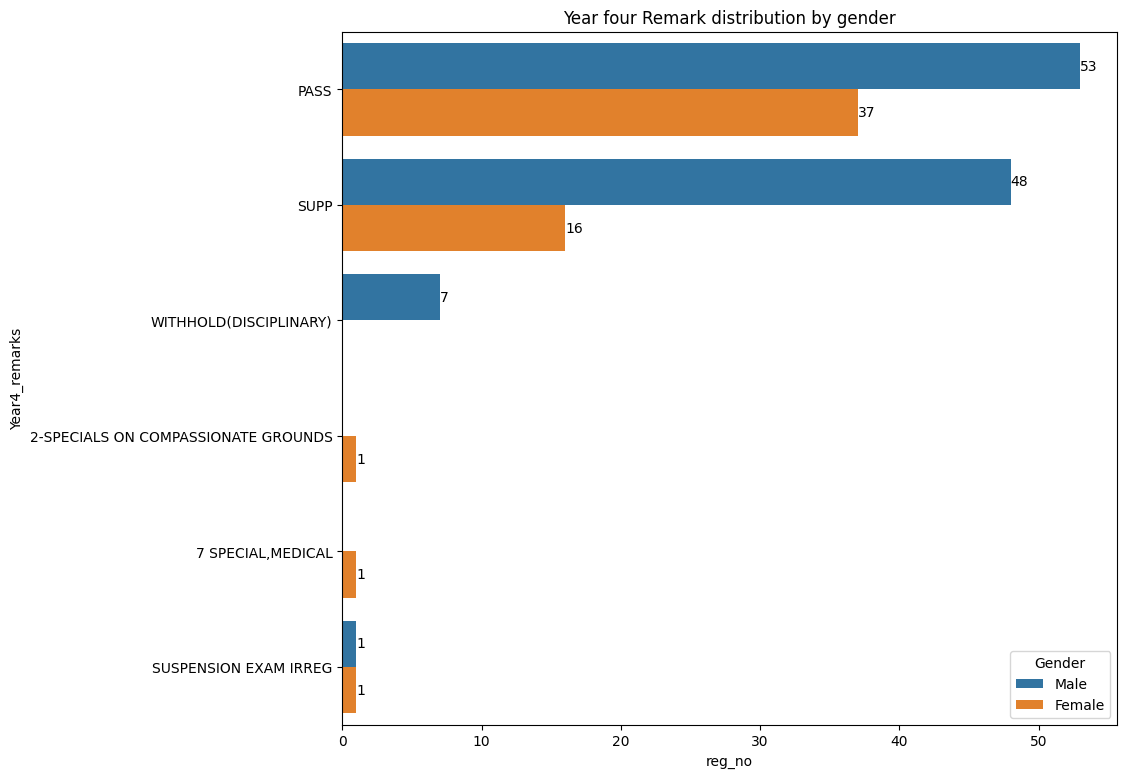

In [182]:
plt.figure(figsize=(10,9))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(final_data.groupby(['Year4_remarks', 'Gender']).count().sort_values(by='reg_no',ascending=False).reset_index(),x='reg_no',y='Year4_remarks',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Year four Remark distribution by gender")
plt.show()

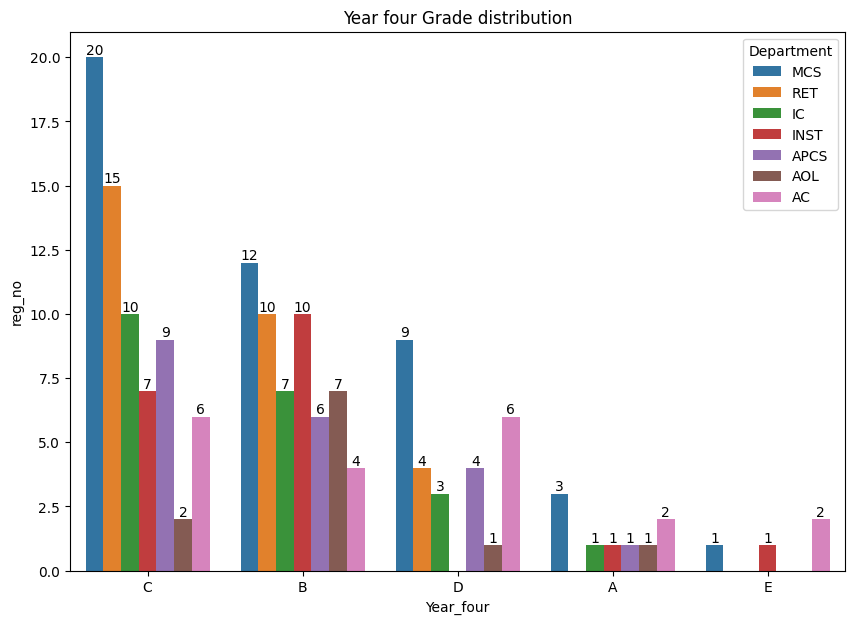

In [187]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(final_data.groupby(['Department', 'Year_four']).count().sort_values(by='reg_no',ascending=False).reset_index(),y='reg_no',x='Year_four',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title('Year four Grade distribution')
plt.show()

In [188]:

final_data['Event'] = np.where(final_data.Time.isin([1,2,3,4]),1,0) #Event of interest labelling 

In [189]:
final_data.Event.value_counts() # the cohort had a total of 126 dropout students

Event
0    155
1    126
Name: count, dtype: int64

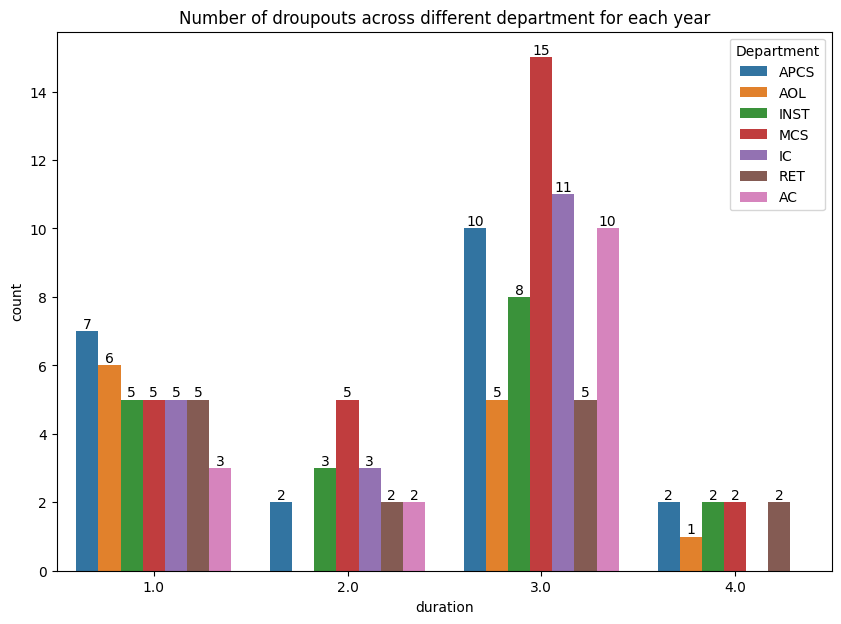

In [194]:
plt.figure(figsize=(10,7))
# combine_data.Cleaned_Remark.value_counts().plot(kind='barh')
ax = sns.barplot(final_data.groupby(['Department', 'Time']).count().sort_values(by='reg_no',ascending=False).reset_index().rename(columns={"reg_no":"count","Time":"duration"}),y='count',x='duration',hue='Department')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title('Number of droupouts across different department for each year')
plt.show()